In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In the last tutorial, you got acquainted with data types, plotting, and, briefly, fitting. In this tutorial, we'll build on the basics, looking at additional means of visualizing data and describing data behavior.

# Histograms

Often when dealing with complex data, it can be useful to look at the actual distribution of values, which can be instructive. Let's start by generating some basic data. Let's roll two dice. Construct a distribution (however you like -- function, using other modules, ...) that simulates this behavior flexibly for a variable number of rolls.

In [3]:
def roll_two_dice(N_rolls):
    return np.random.randint(1, 7, N_rolls) + np.random.randint(1, 7, N_rolls)

Now plot the distribution of outputs for 10 rolls, 100 rolls, 1000 rolls, and 1e4 rolls. Within matplotlib.pyplot the _plt.hist_ function generates a histogram. Generally, the data will be automatically binned. To change this, you can feed the argument _bins_ a single integer, allowing _plt.hist_ to choose that number of equally spaced bins based on your data, or you can give _bins_ a list of numbers, which will serve as the bin edges.

You can change the style of the histogram with _histtype_ and the normalization with _weights_ or _density_ (the latter normalizes the histogram so the area under the histogram = 1).

Text(0.5, 0, 'roll sum')

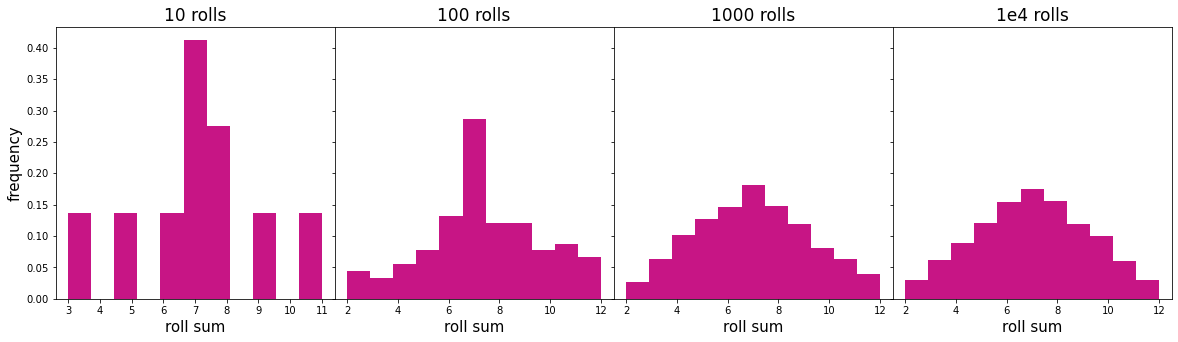

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize =  (20, 5), gridspec_kw = {'wspace':0}, sharey = True)
ax1.hist(roll_two_dice(10), color = 'mediumvioletred', histtype = 'bar', density = True, bins = 11)
ax1.set_title('10 rolls', fontsize = 17)
ax1.set_xlabel('roll sum', fontsize = 15)
ax1.set_ylabel('frequency', fontsize = 15)

ax2.hist(roll_two_dice(100), color = 'mediumvioletred', histtype = 'bar', density = True, bins = 11)
ax2.set_title('100 rolls', fontsize = 17)
ax2.set_xlabel('roll sum', fontsize = 15)

ax3.hist(roll_two_dice(1000), color = 'mediumvioletred', histtype = 'bar', density = True, bins = 11)
ax3.set_title('1000 rolls', fontsize = 17)
ax3.set_xlabel('roll sum', fontsize = 15)

ax4.hist(roll_two_dice(10**4), color = 'mediumvioletred', histtype = 'bar', density = True, bins = 11)
ax4.set_title('1e4 rolls', fontsize = 17)
ax4.set_xlabel('roll sum', fontsize = 15)

You should see that the distribution gets more and more consistent as you increase the number of rolls. Good to check that basic statistics principles hold up!

***

# Fitting histograms

Now let's say you were interested in parameterizing the distribution in your histogram. Just like we fit the functional form of a line in the last tutorial, we can fit the functional form of standard distributions to our histogram.

Because we're astronomers, let's choose approximate the distribution of our dice roll results as Gaussian. Go ahead and create a function to fit a Gaussian below. We'll do this in the **many** rolls case -- 1e4 iterations.

In [5]:
def single_gauss(x, sigma, mu, N):
    gauss = N*np.exp(-0.5*((x - mu)/sigma)**2)
    
    return gauss

Now we need to actually get out data to fit. Thankfully, this is made very easy by _plt.hist_.

In order to plot the histogram in the first place, matplotlib has to store bin and frequency data somewhere, so all we have to do is access this information.

Text(0.5, 0, 'roll sum')

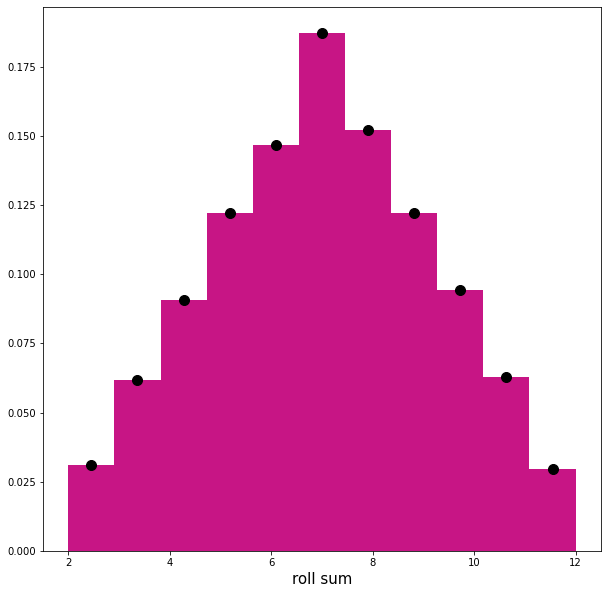

In [6]:
fig = plt.figure(figsize =(10, 10))
(n, bins, _) = plt.hist(roll_two_dice(10**4), color = 'mediumvioletred', histtype = 'bar', 
                        density = True, bins = 11, zorder = 0)


mid_bin = (bins[:-1] + bins[1:])/2

plt.scatter(mid_bin, n, color = 'k', s = 100, zorder = 1)
plt.xlabel('roll sum', fontsize = 15)

After we read out the bin edges ("bins") and the frequency ("n"), we need to play with the numbers a bit to make them conducive to fitting. Primarily, we need to select which x-values we'll actually use. Because the bin edges are read out, I generally like to take the middle of the bin as the point (though you could use the left or right bin edge just as well).

To define the middle of the bin, I use the line that starts with _mid_bin_. The output points are overlaid in black on top of the histogram. (The useful Jupyter notebook command _zorder_ will allow you to define individual layers in your plots.)

We can now fit the distribution just like we would a line or anything else with _scipy.opimize.curve_fit_.

Text(0.5, 0, 'roll sum')

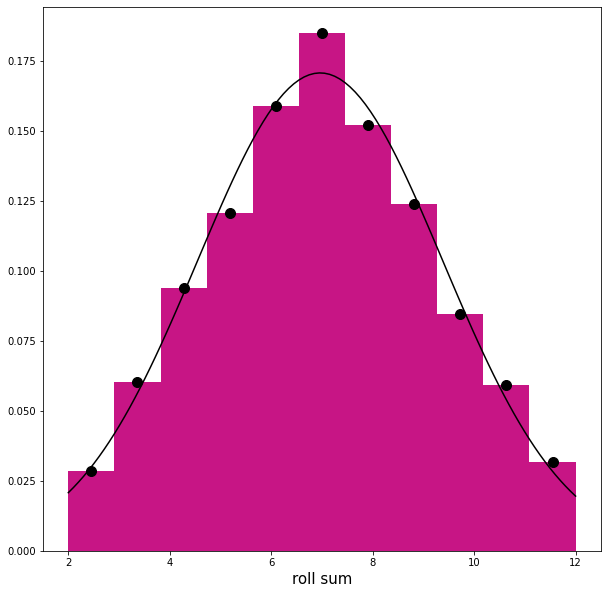

In [7]:
fig = plt.figure(figsize =(10, 10))
(n, bins, _) = plt.hist(roll_two_dice(10**4), color = 'mediumvioletred', histtype = 'bar', 
                        density = True, bins = 11, zorder = 0)


mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

plt.scatter(mid_bin, n, color = 'k', s = 100, zorder = 1)

popt, pcov = curve_fit(single_gauss, mid_bin, n)

plt.plot(x, single_gauss(x, *popt), color = 'k')

plt.xlabel('roll sum', fontsize = 15)

***

# Exercise

Use your newfound skills to build and fit a double Gaussian distribution. There are many options for how to do this, some of which are easier than others. Do try to avoid pre-made modules/tools except for the random number generation, though!

You may need to play more with the number of bins you feed the fitting and even the initial guesses for optimal parameters (_p0_ within the call to _curve_fit_.) 

In [8]:
def double_gauss(x, sigma_1, mu_1, N_1, sigma_2, mu_2, N_2):
    gauss_1 = N_1*np.exp(-0.5*((x - mu_1)/sigma_1)**2)
    gauss_2 = N_2*np.exp(-0.5*((x - mu_2)/sigma_2)**2)
    
    return gauss_1 + gauss_2

Text(0.5, 0, 'roll sum')

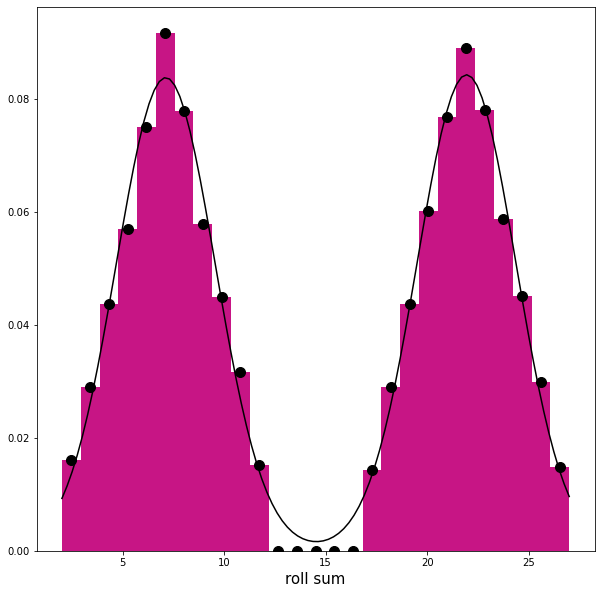

In [9]:
fig = plt.figure(figsize =(10, 10))
(n, bins, _) = plt.hist(np.concatenate((roll_two_dice(10**4), roll_two_dice(10**4)+15)),
                        color = 'mediumvioletred', histtype = 'bar', 
                        density = True, zorder = 0, bins = 27)


mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

plt.scatter(mid_bin, n, color = 'k', s = 100, zorder = 1)

popt, pcov = curve_fit(double_gauss, mid_bin, n, p0 = [3, 6, 0.1, 3, 21, 0.1])

plt.plot(x, double_gauss(x, *popt), color = 'k')

plt.xlabel('roll sum', fontsize = 15)